In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path = 'C:/Users/amuly/Gun Violence/'

In [3]:
# import data
df = pd.read_csv(os.path.join(path,'02 Data','Original Data','gun.csv'))

In [4]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [5]:
df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [6]:
dup=df.duplicated()

In [7]:
dup.shape

(239677,)

In [8]:
# removing unnecessary columns
df_cleaned = df.drop(['state_senate_district', 
                                         'state_house_district', 
                                         'source_url','participant_name',
                                         'incident_url',
                                         'congressional_district',
                                         'location_description',
                                         'incident_url_fields_missing',
                                         'sources',
                                         'participant_status',
                                         'gun_stolen',
                                         'participant_type',
                                         'participant_age_group',
                                         'participant_gender',
                                         'participant_relationship'],
                                         axis=1).set_index('incident_id').copy()

In [9]:
df_cleaned.head()

,date,state,city_or_county,address,n_killed,n_injured,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,notes,participant_age
incident_id,,,,,,,,,,,,,
461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20
460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20
478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33
478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33
478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47


In [10]:
df_cleaned.dtypes

date                         object
state                        object
city_or_county               object
address                      object
n_killed                      int64
n_injured                     int64
gun_type                     object
incident_characteristics     object
latitude                    float64
longitude                   float64
n_guns_involved             float64
notes                        object
participant_age              object
dtype: object

In [11]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date']) 

In [12]:
# changing all the unknowns in gun type with NaN for consistency
df_cleaned['gun_type'] = df_cleaned['gun_type'].mask(df_cleaned['gun_type'].str.contains('Unknown', na=False), np.nan)

In [13]:
df_cleaned.head()

,date,state,city_or_county,address,n_killed,n_injured,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,notes,participant_age
incident_id,,,,,,,,,,,,,
461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20
460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20
478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33
478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33
478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47


#### Correlations

In [14]:
df_corr = df_cleaned[['n_killed','n_injured','n_guns_involved']]

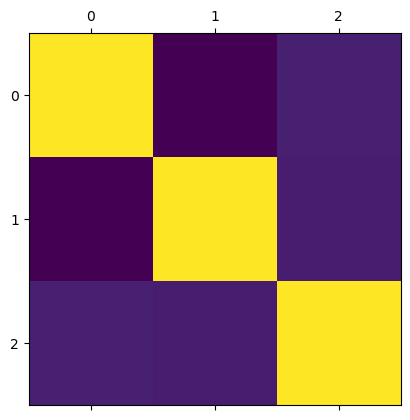

In [15]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_corr.corr())
plt.show()

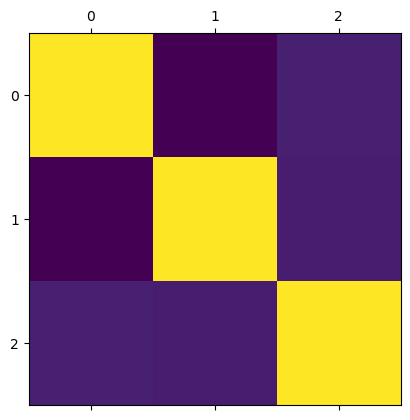

In [16]:
# Save figure
plt.matshow(df_corr.corr())
plt.savefig("out.png")

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 800x800 with 0 Axes>

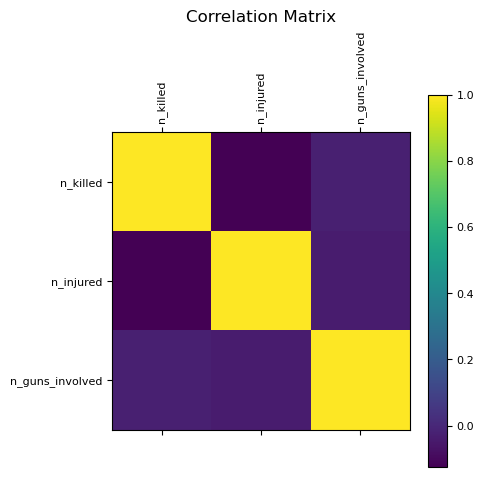

In [17]:
# correlation matrix with labels

cmp = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_corr.corr()) # type of plot
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8, rotation=90) # x axis labels
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=8) # y axis labels

#setup layout
cb = plt.colorbar() # add a colour legend
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=12)

#### creating a heatmap with seaborn

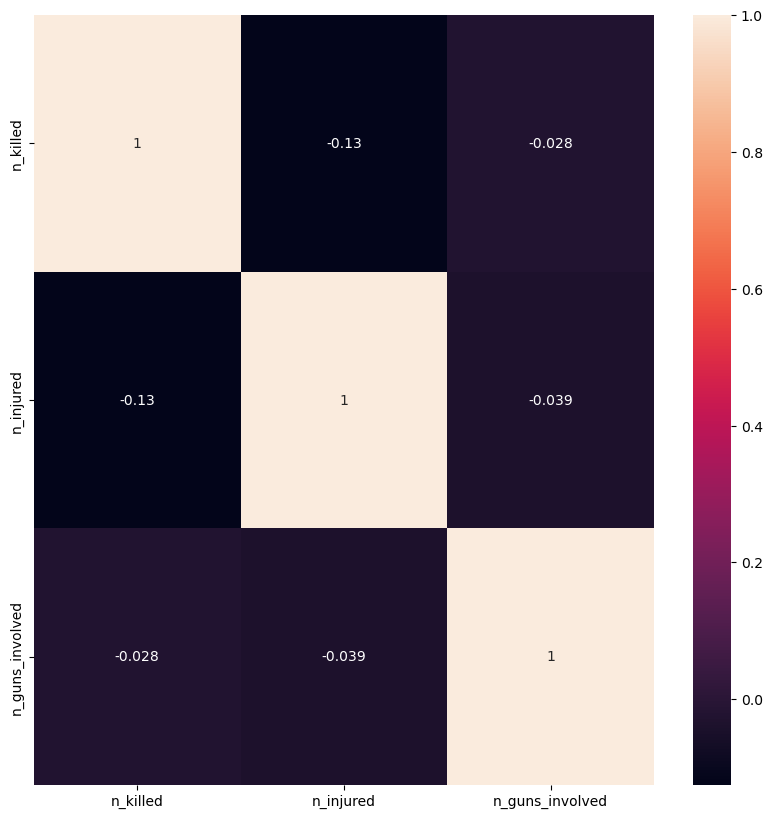

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
hmap = sns.heatmap(df_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Discuss what the coefficients in the plot mean in terms of the relationships between the variables

#### The correlation coefficients show very weak relationships between the variables. The number of people killed and injured are slightly negatively correlated meaning incidents often result in either more deaths or more injuries but not both at the same time. The number of guns involved shows almost no correlation with casualties, suggesting weapon count alone does not predict the severity of outcomes.

In [19]:
#export heatmap
hmap.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','heatmap_gun_violence_analysis.png'))

#### scatterplots

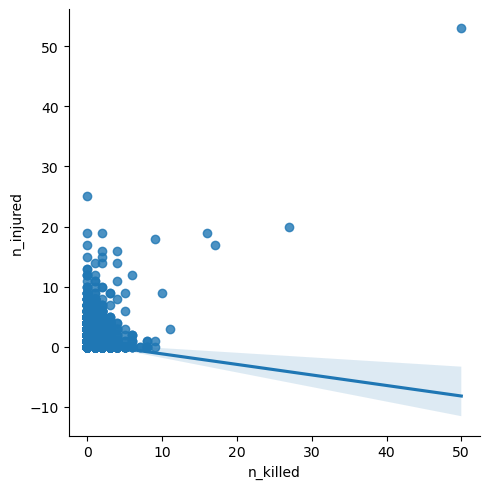

In [20]:
# Create a scatterplot for the " n_killed" and "n_injured" columns in seaborn

sns.lmplot(x = "n_killed", y = "n_injured", data = df)

#### Discuss the output in a markdown cell.
The scatterplot shows the relationship between the number of people killed and the number of people injured in incidents. Most data points are clustered near zero, indicating that the majority of events result in few casualties. A slight negative trend is visible supporting the idea that incidents with higher fatalities often involve fewer injuries and vice versa. Outliers with extremely high deaths or injuries highlight rare but severe events.

#### pair plots

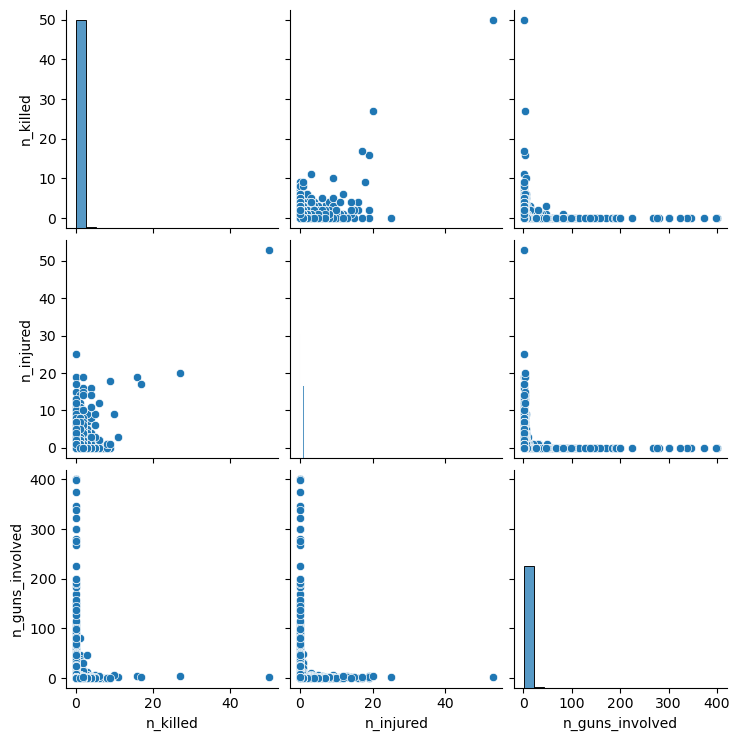

In [21]:
# Create a pair plot 
g = sns.pairplot(df_corr)

#### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.
The pair plot highlights the distributions and relationships between the variables n_killed, n_injured, and n_guns_involved. All three variables are highly skewed with most values concentrated near zero and only a few extreme outliers stretching the scales. The scatterplots show that while fatalities and injuries sometimes occur together, there is no clear linear trend with the number of guns involved.

#### categorical plots

<Axes: xlabel='n_injured', ylabel='Count'>

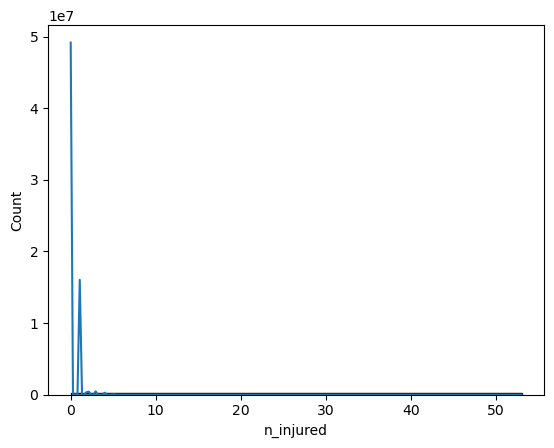

In [22]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_corr['n_injured'], bins = 1, kde = True)

In [25]:
df_corr.loc[df_corr['n_injured'] <= 0, 'result_of_the_violence'] = 'no_injuries'

In [26]:
df_corr.loc[df_corr['n_injured'] == 1, 'result_of_the_violence'] = 'single_injury'

In [27]:
df_corr.loc[(df_corr['n_injured'] > 1) & (df_corr['n_injured'] <= 5),  "result_of_the_violence"] = "few_injuries"

In [28]:
df_corr['result_of_the_violence'].value_counts(dropna = False)

result_of_the_violence
no_injuries      142487
single_injury     81986
few_injuries      14998
NaN                 206
Name: count, dtype: int64

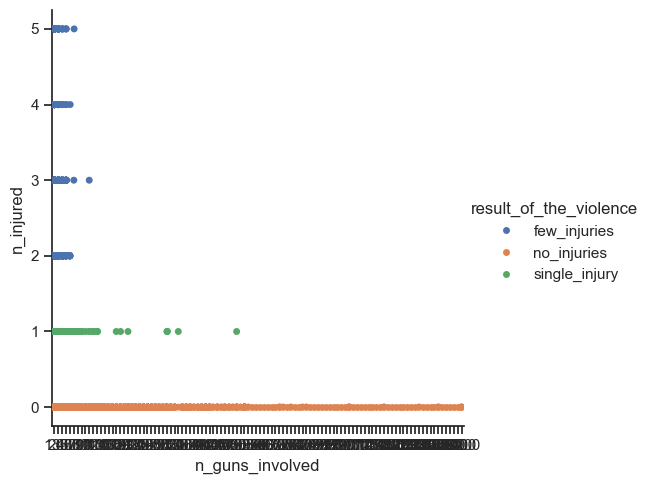

In [29]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x='n_guns_involved', y='n_injured', hue='result_of_the_violence', data=df_corr)

#### discuss the result
The majority of incidents fall into the “no injuries” group regardless of how many guns were involved. Cases with a single injury are also frequent, while incidents with few injuries (2–5) are less common.

#### Q7 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.
What is the distribution of casualties across incidents?

Most incidents result in no injuries or deaths.

Is there a relationship between the number of people killed and the number injured?

The correlation coefficient (-0.13) and scatterplot suggest a slight negative relationship. Incidents tend to result in either more deaths or more injuries but rarely both at the same time.


#### Q8 Define any hypotheses that you can at this point. You’ll be testing these later on

The number of guns involved has no effect on the number of people killed or injured.

There is no relationship between the number of people killed and the number of people injured in an incident.

